<a href="https://colab.research.google.com/github/phan-le-phu/CS114.K21/blob/master/round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Load dữ liệu trực tiếp từ đường dẫn http://cs.uit.edu.vn/data2.txt bằng cách sử dụng hàm read_csv của thư viện pandas thu được tập dataset là một dataframe có hai cột dự liệu được đặt tên tương ứng với cột thứ nhất là *sizes* và cột thứ hai tên tương ứng là times. Trong đó sizes chính là feature còn times là label. Ứng vỗi mỗi giá trị có trong cột sizes thì có giá trị kệt quả trong cột times

In [0]:
# Load dataset
url = "http://cs.uit.edu.vn/data2.txt"
names = ['sizes', 'times']
dataset = pd.read_csv(url, names=names)

In [35]:
# shape
print(dataset.shape)

(71115, 2)


In [36]:
# head
print(dataset.head(20))

      sizes     times
0   6083695  0.521842
1   1954367  0.152648
2   3734185  0.298548
3   5839301  0.460480
4   6343427  0.527977
5   1355574  0.098012
6    725488  0.048238
7   1191887  0.089304
8   4556292  0.378561
9   9989596  0.832734
10  7698040  0.647709
11  1690816  0.123954
12  4414398  0.341109
13  6999006  0.553852
14  8011311  0.641649
15  7988686  0.643173
16  8924801  0.718659
17  6212110  0.491007
18  5195238  0.399880
19  7820803  0.622873


In [37]:
# descriptions
print(dataset.describe())

              sizes         times
count  7.111500e+04  71115.000000
mean   4.998766e+06      0.406785
std    2.882618e+06      0.244039
min    2.550000e+02      0.000009
25%    2.496521e+06      0.192746
50%    5.010144e+06      0.403410
75%    7.481742e+06      0.616155
max    9.999882e+06      0.983776


In [38]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71115 entries, 0 to 71114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sizes   71115 non-null  int64  
 1   times   71115 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB
None


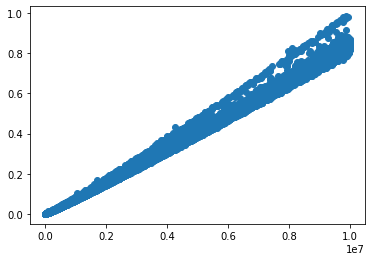

In [39]:
plt.scatter(dataset["sizes"],dataset["times"])
plt.show()


# Chia dữ liệu thành hai phần train dataset và test dataset

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset["sizes"], dataset["times"], test_size = 0.2)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)


# Vì đây là bài toán regression nên chọn model regression từ thư viện skleran và train model bằng tập dự liệu train dataset (X_train, Y_train)

In [41]:
my_model =  linear_model.LinearRegression()
my_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# đánh giá model bằng cách sử dụng tập dữ liệu X_test nhận được kết quả dự đoán Y_pred. Đem so sánh kết quả dự đoán thu được là Y_pred với tập dự liệu Y_test. Nhận thấy Mean squared error: 0.00014 và R^2 = 1 nên đánh giá model khá là đáng tin cậy

In [0]:
Y_pred = my_model.predict(X_test)

In [43]:
# The coefficients
print('Coefficients: \n', my_model.coef_)
# The mean squared error
print('Mean squared error: %.20f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: 
 [[8.45598904e-08]]
Mean squared error: 0.00013522237495104878
Coefficient of determination: 1.00


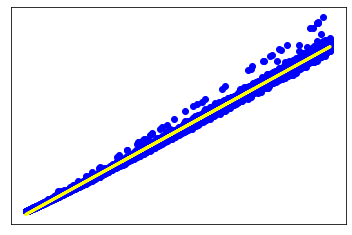

In [44]:
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, Y_pred, color='yellow', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Ứng dụng dùng để thực hiện predict một mẩu dữ liệu mới. Yêu cấu người dùng nhập vào bao giá trị cần kiểm tra. Sau đó chương trinh sẻ yêu câu người dùng nhập lần lượt từng giá trị một và xuất ra kết quả dự đoán cho giá trị đó.


In [45]:
print("Số mẫu thử :")
for i in range(int(input())):
  print("Nhập giá trị thứ {}:".format(i))
  print("--> %.20f" % my_model.predict(np.array([int(input())]).reshape(1, -1)))


Số mẫu thử :
3
Nhập giá trị thứ 0:
21241414
--> 1.78030218257787598013
Nhập giá trị thứ 1:
2141513
--> 0.16521664651782619337
Nhập giá trị thứ 2:
41413123
--> 3.48601968569542286502


# save lại model 

In [46]:
import joblib
filename = 'round2_model.sav'
joblib.dump(my_model, filename)

['round2_model.sav']